## Warnings

In [1]:
import warnings

warnings.filterwarnings('ignore')

## Imports

In [4]:
import polars as pl
import pandas as pd
import pygwalker as pyg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import polars.selectors as cs
from janitor.polars import clean_names
from ydata_profiling import ProfileReport
from scipy.stats.contingency import association
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC, SMOTEN
import altair as alt
import os

current_path = os.getcwd()

# Dataset Deals

In [5]:
dataset_path = os.path.join(current_path, "data", "raw_data.csv")
pandas_df = pd.read_csv(dataset_path)
polars_df = pl.from_pandas(pandas_df)

In [6]:
polars_df.shape

(14036, 31)

In [7]:
polars_df.schema

Schema([('syn_error_rate', Float64),
        ('connection_time', Int64),
        ('destination_same_source_port_rate', Float64),
        ('destination_different_server_rate', Float64),
        ('connection_status', String),
        ('connection_count', Int64),
        ('destination_server_different_host_rate', Float64),
        ('suspicious_activity', Int64),
        ('protocol', String),
        ('server_different_host_rate', Float64),
        ('destination_server_syn_error_rate', Float64),
        ('destination_host_server_count', Int64),
        ('destination_same_server_rate', Float64),
        ('fragment_errors', Int64),
        ('compromised_count', Int64),
        ('source_bytes', Int64),
        ('service_type', String),
        ('destination_syn_error_rate', Float64),
        ('same_server_rate', Float64),
        ('reset_error_rate', Float64),
        ('server_request_count', Int64),
        ('destination_server_reset_error_rate', Float64),
        ('server_reset_error_rate',

In [8]:
polars_df = clean_names(df=polars_df, case_type='lower', remove_special=True, strip_accents=True,
                        strip_underscores=True, truncate_limit=None)

In [9]:
polars_df.null_count()

syn_error_rate,connection_time,destination_same_source_port_rate,destination_different_server_rate,connection_status,connection_count,destination_server_different_host_rate,suspicious_activity,protocol,server_different_host_rate,destination_server_syn_error_rate,destination_host_server_count,destination_same_server_rate,fragment_errors,compromised_count,source_bytes,service_type,destination_syn_error_rate,same_server_rate,reset_error_rate,server_request_count,destination_server_reset_error_rate,server_reset_error_rate,server_syn_error_rate,destination_bytes,guest_login,authentication_status,destination_host_count,destination_reset_error_rate,different_server_rate,class
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
polars_df.select(cs.numeric()).describe()

statistic,syn_error_rate,connection_time,destination_same_source_port_rate,destination_different_server_rate,connection_count,destination_server_different_host_rate,suspicious_activity,server_different_host_rate,destination_server_syn_error_rate,destination_host_server_count,destination_same_server_rate,fragment_errors,compromised_count,source_bytes,destination_syn_error_rate,same_server_rate,reset_error_rate,server_request_count,destination_server_reset_error_rate,server_reset_error_rate,server_syn_error_rate,destination_bytes,guest_login,authentication_status,destination_host_count,destination_reset_error_rate,different_server_rate
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0,14036.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.039788,184.191294,0.122315,0.044255,28.048019,0.025829,0.221288,0.122144,0.032572,182.678755,0.783955,0.001567,0.393346,11341.807922,0.039907,0.94019,0.048265,27.400328,0.048468,0.049172,0.037901,4226.110074,0.012183,0.681177,151.48625,0.050431,0.032923
"""std""",0.183392,1448.60408,0.257433,0.135233,63.798968,0.07139,2.327768,0.266557,0.168483,97.214193,0.348346,0.06751,13.949886,169682.168932,0.180893,0.211918,0.211091,60.297916,0.20034,0.211871,0.179243,68334.655301,0.109706,0.466037,101.76511,0.203809,0.151932
"""min""",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.0,0.65,0.0,0.0,78.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,72.0,0.0,0.0,43.0,0.0,0.0
"""50%""",0.0,0.0,0.01,0.0,5.0,0.0,0.0,0.0,0.0,254.0,1.0,0.0,0.0,229.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,347.0,0.0,1.0,168.0,0.0,0.0
"""75%""",0.0,0.0,0.08,0.02,15.0,0.03,0.0,0.1,0.0,255.0,1.0,0.0,0.0,323.0,0.0,1.0,0.0,18.0,0.0,0.0,0.0,1924.0,0.0,1.0,255.0,0.0,0.0
"""max""",1.0,41476.0,1.0,1.0,511.0,1.0,77.0,1.0,1.0,255.0,1.0,3.0,884.0,7.665876e6,1.0,1.0,1.0,511.0,1.0,1.0,1.0,5.131424e6,1.0,1.0,255.0,1.0,1.0


In [11]:
polars_df.select(cs.string()).describe()

statistic,connection_status,protocol,service_type,class
str,str,str,str,str
"""count""","""14036""","""14036""","""14036""","""14036"""
"""null_count""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null
"""std""",null,null,null,null
"""min""","""OTH""","""icmp""","""IRC""","""anomaly"""
"""25%""",null,null,null,null
"""50%""",null,null,null,null
"""75%""",null,null,null,null
"""max""","""SF""","""udp""","""whois""","""normal"""


In [13]:
polars_df = polars_df.rename({"class": "target"})

In [14]:
profile = ProfileReport(pandas_df, title="Pred-Sus-Act Report", lazy=True, explorative=True, tsmode=True)

In [15]:
# profile.to_file("data/report.html")

## Extra Visuals

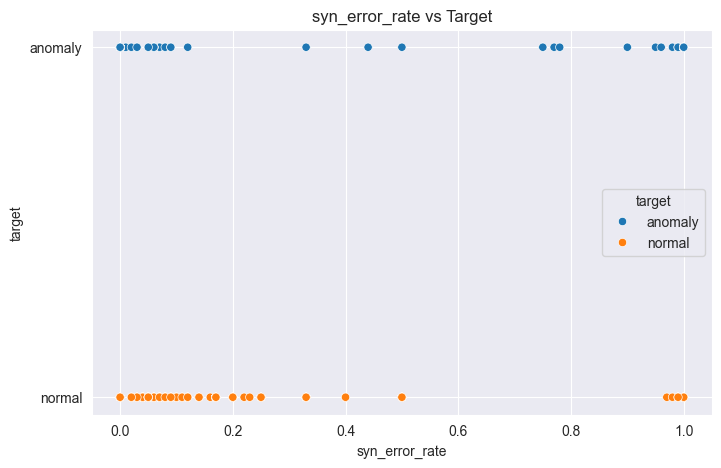

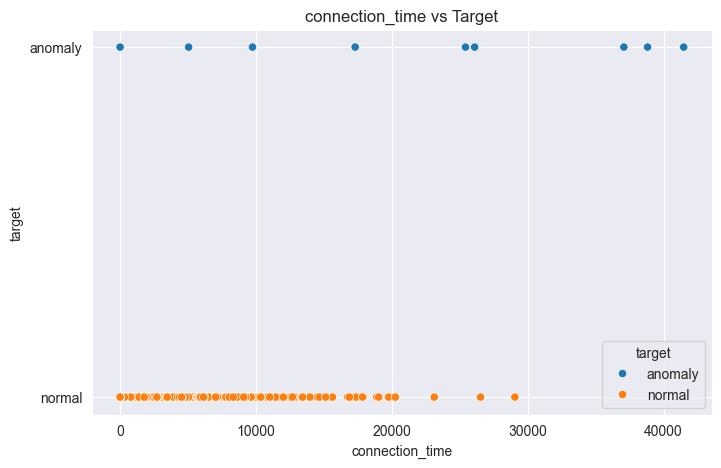

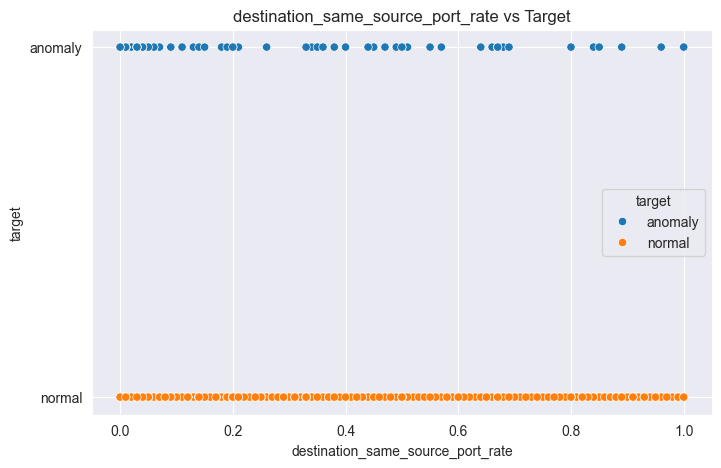

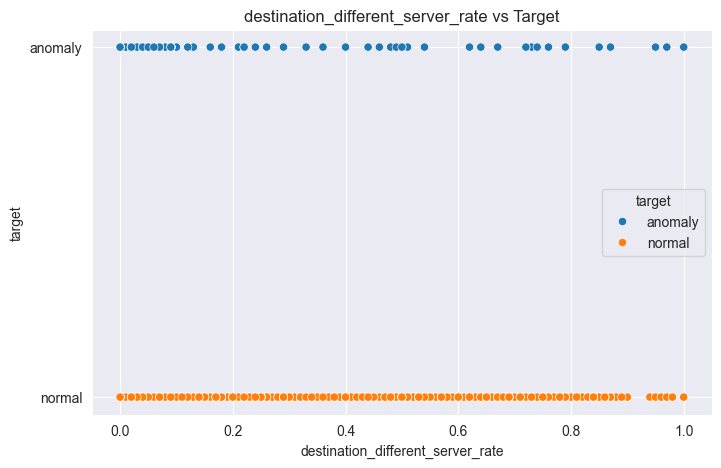

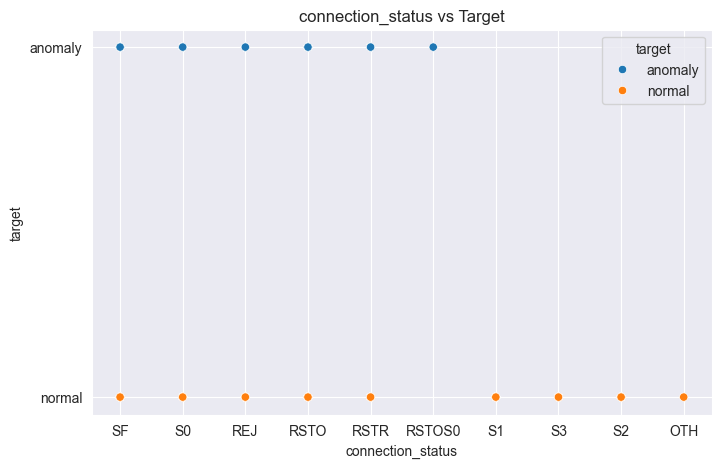

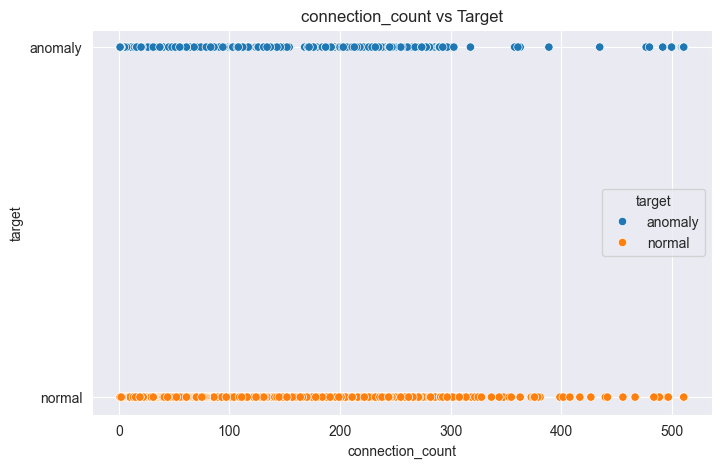

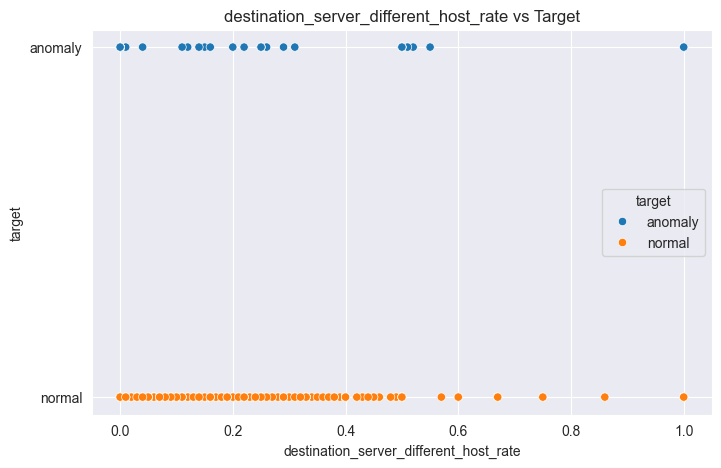

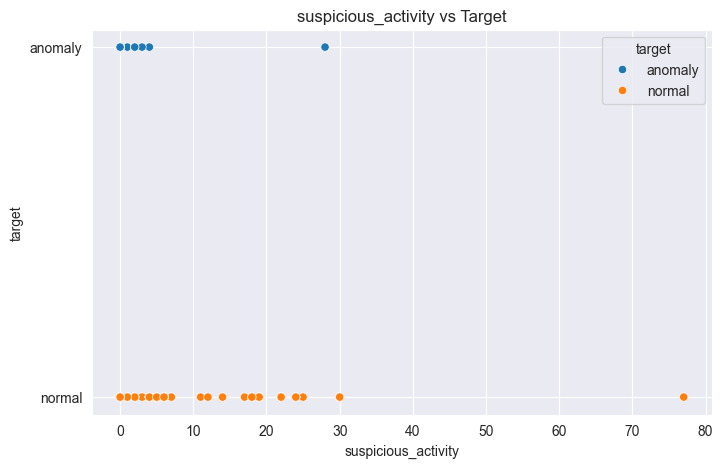

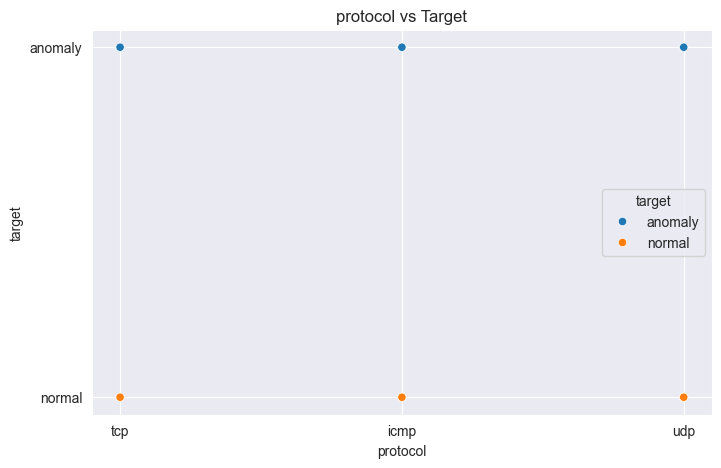

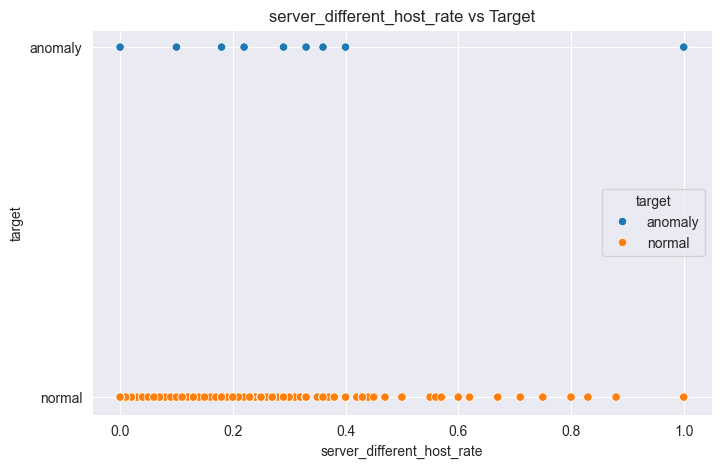

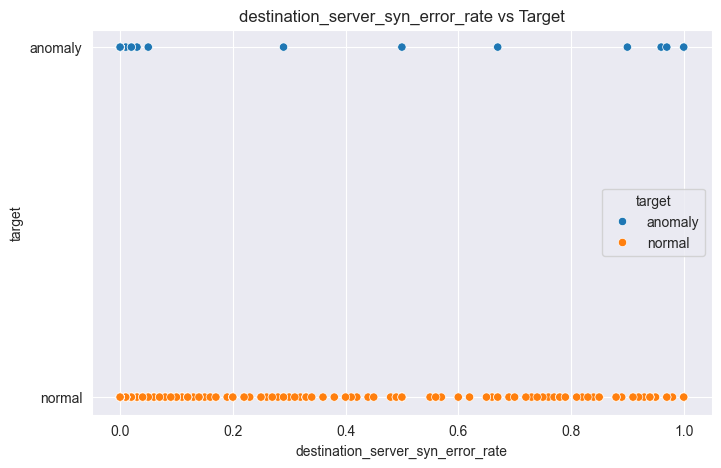

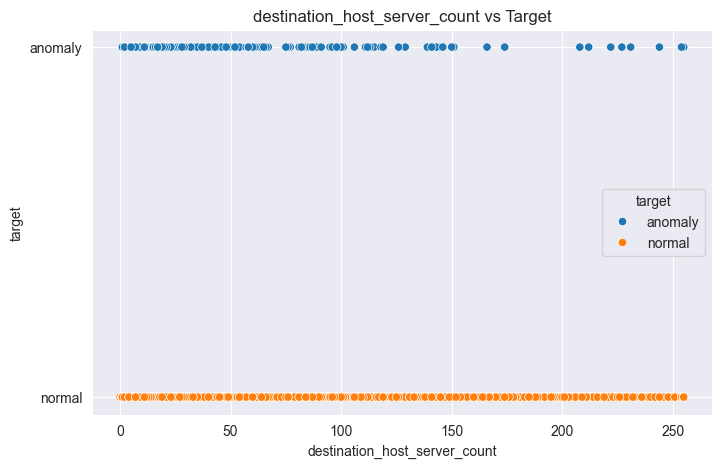

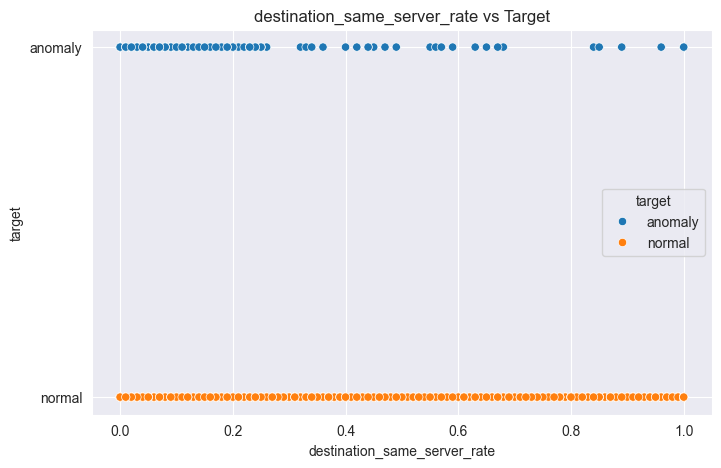

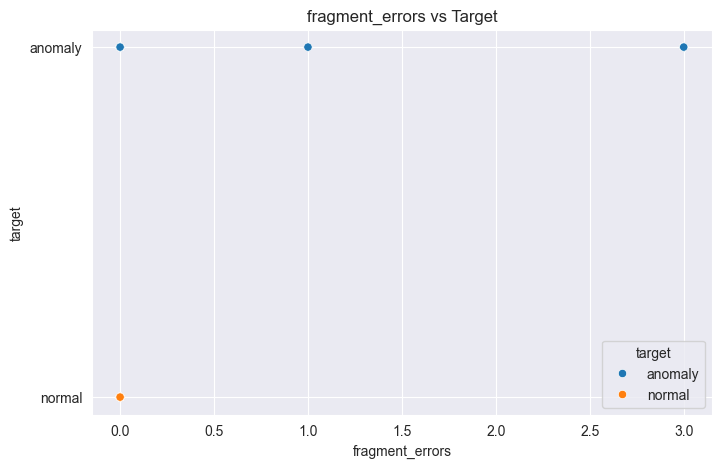

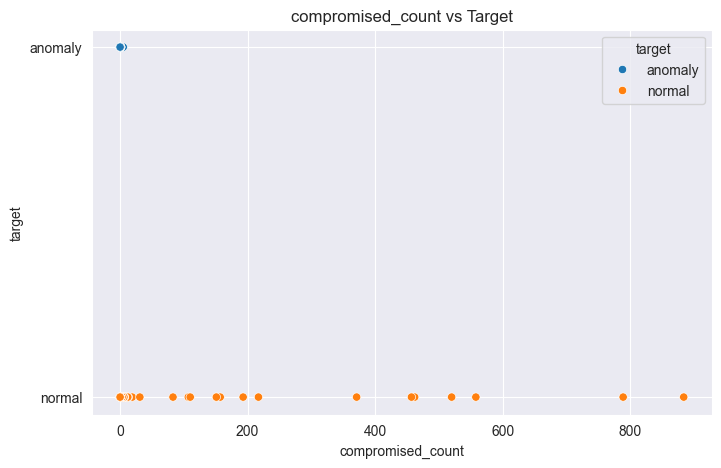

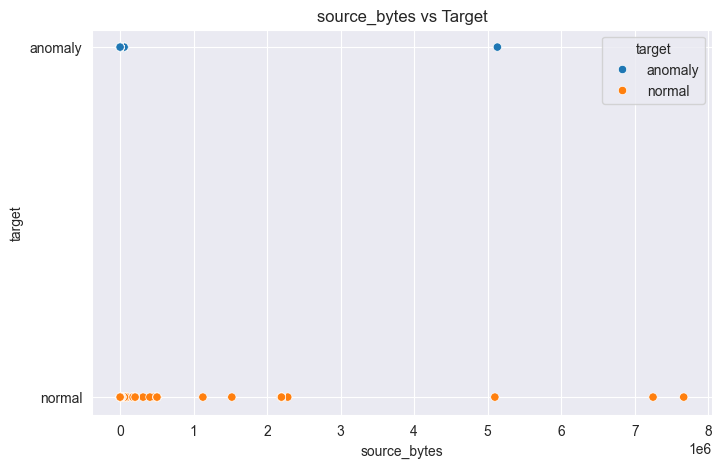

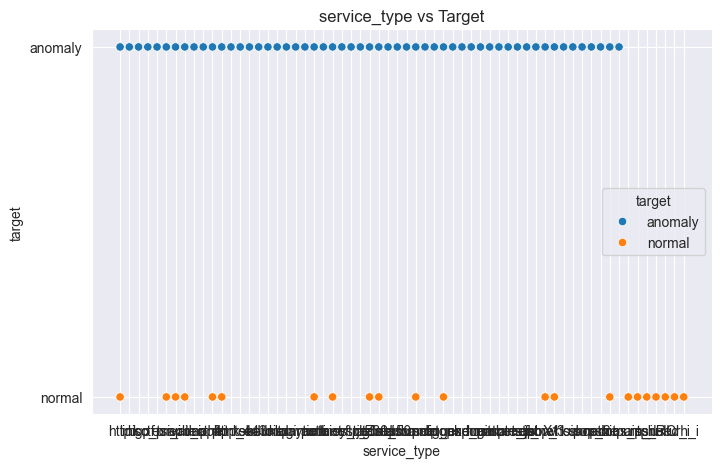

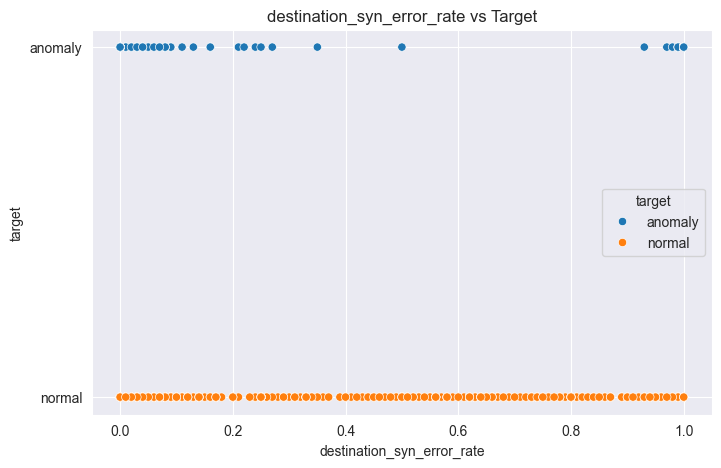

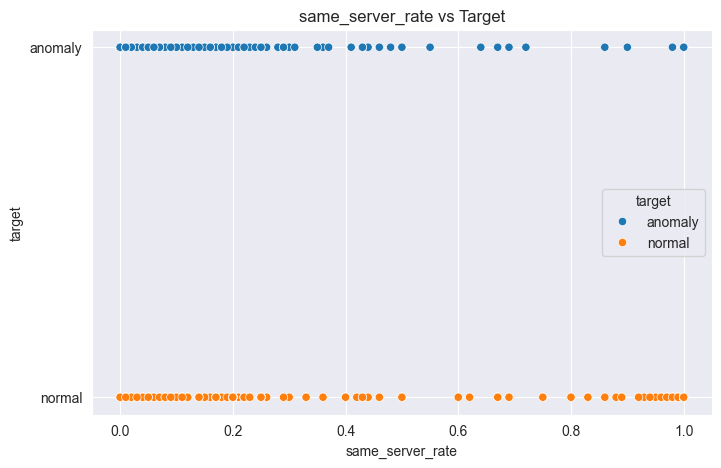

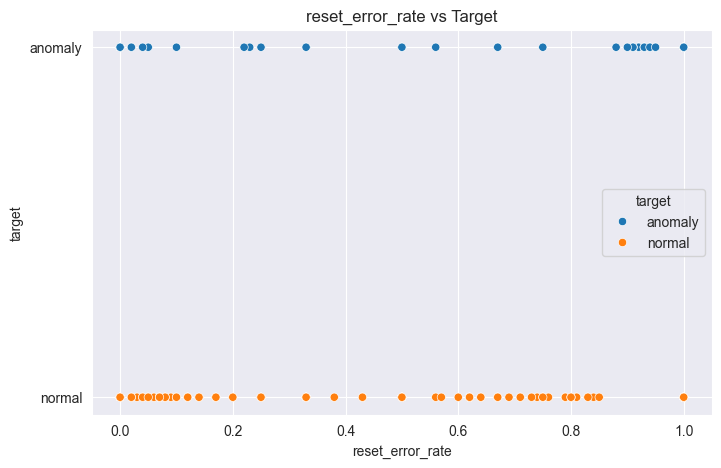

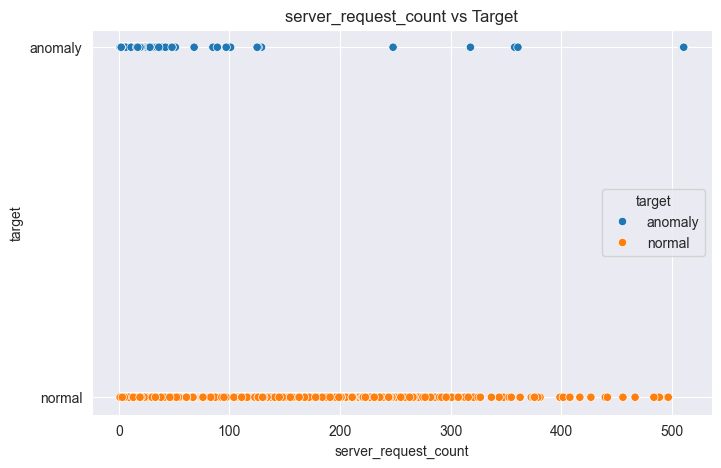

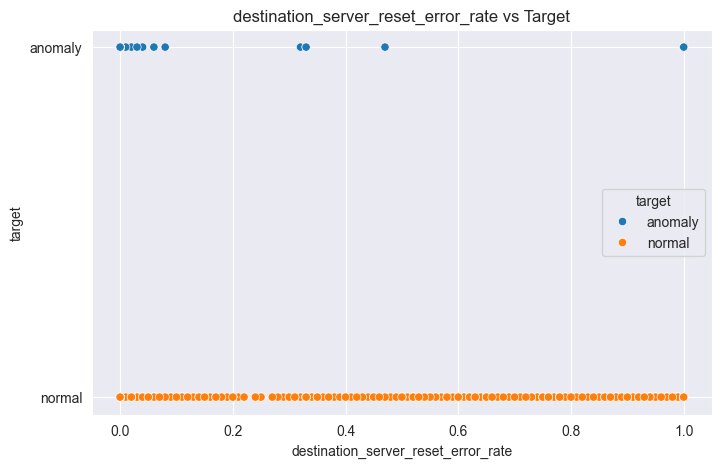

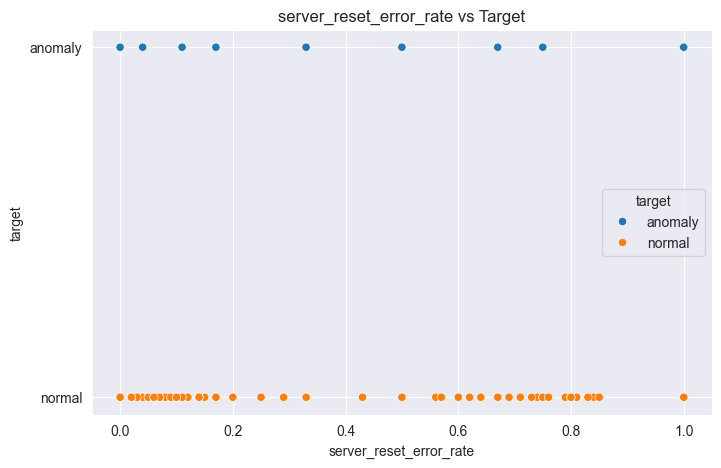

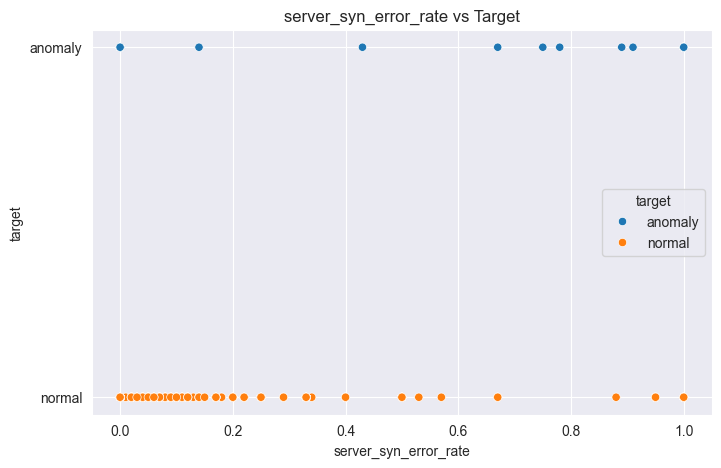

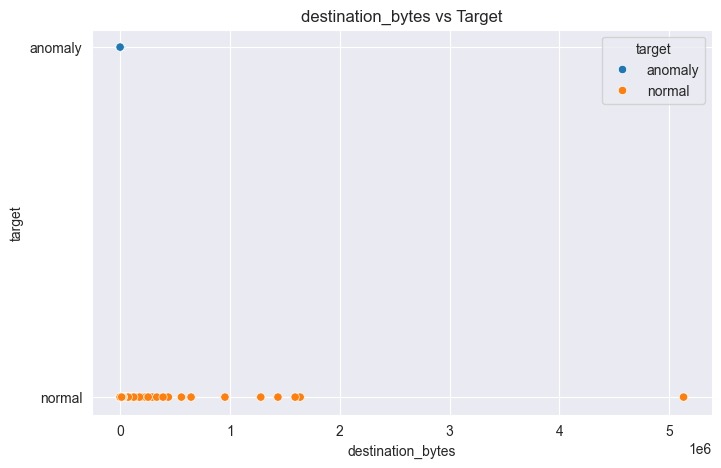

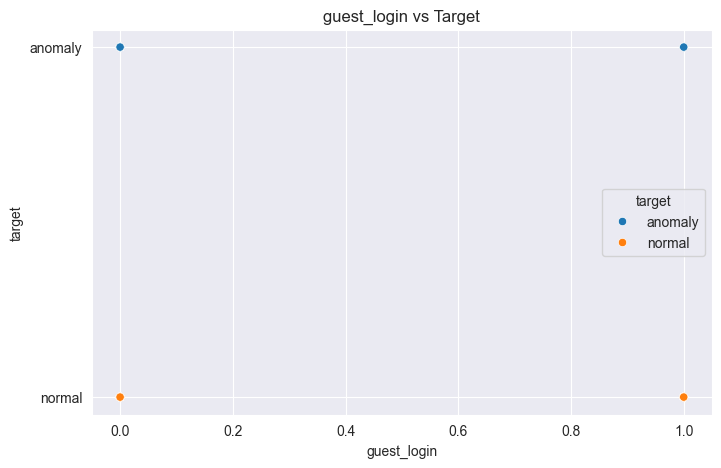

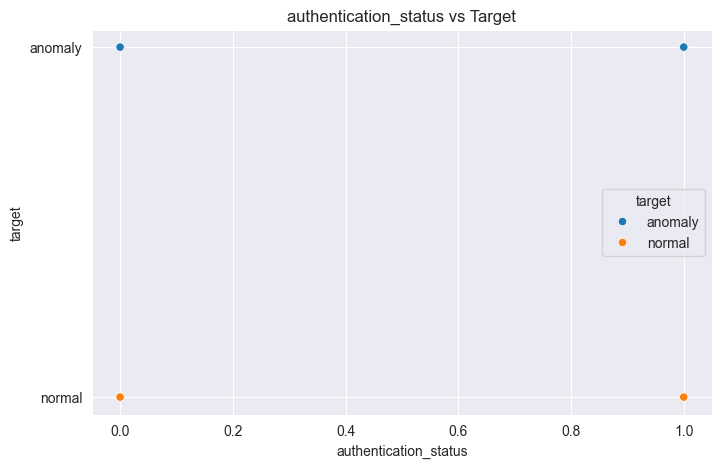

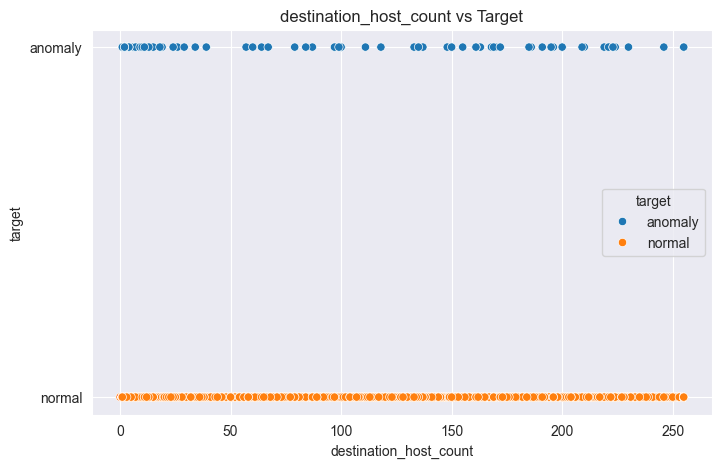

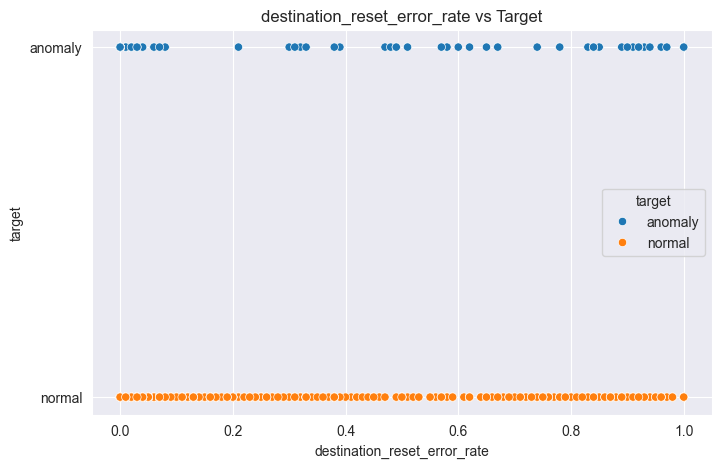

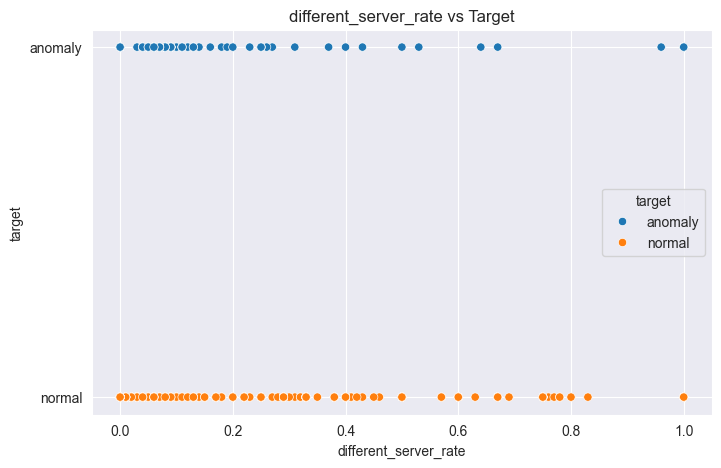

In [17]:
%matplotlib inline

for col in polars_df.columns:
    if col != "target":
        plt.figure(figsize=(8, 5))  # setting figure size for each plot
        sns.scatterplot(x=col, y="target", hue="target", data=polars_df)
        plt.title(f'{col} vs Target')
        plt.show()


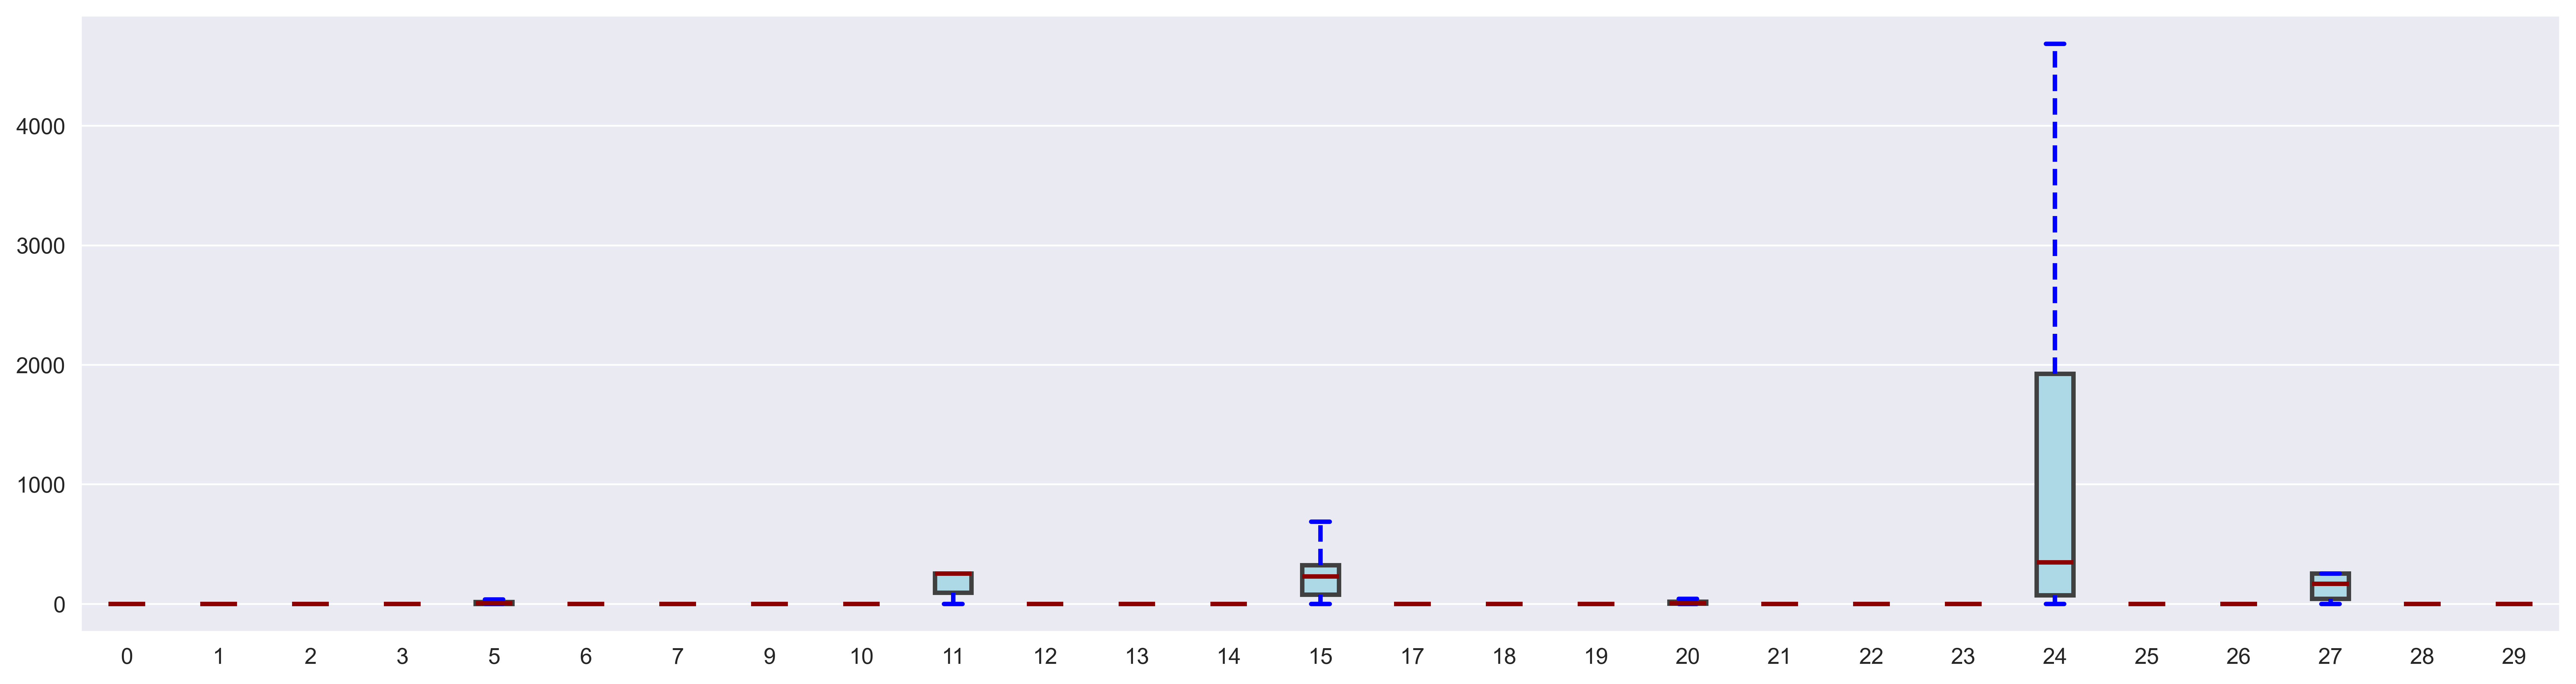

In [18]:
plt.figure(figsize=(20, 5), dpi=500)

sns.boxplot(
    data=polars_df,
    showfliers=False,  # hide extreme outliers
    boxprops=dict(facecolor="lightblue", linewidth=2),  # box styling
    whiskerprops=dict(color="blue", linewidth=2, linestyle="--"),
    medianprops=dict(color="darkred", linewidth=2),
    capprops=dict(color="blue", linewidth=2),
    gap=1.5
)

plt.show()

In [19]:
[polars_df.columns[11], polars_df.columns[15], polars_df.columns[24], polars_df.columns[27]]

['destination_host_server_count',
 'source_bytes',
 'destination_bytes',
 'destination_host_count']

## Analysis Playground

In [21]:
pyg.walk(polars_df, kernel_computation=True, appearance="dark", theme_key="vega")

C:\Users\Osama_Ashraf\AppData\Local\pypoetry\Cache\virtualenvs\pred-sus-act-cVwyjhFO-py3.12\Lib\site-packages\pygwalker\data_parsers\polars_parser.py:43: DeprecationWarning: `NUMERIC_DTYPES` is deprecated. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  if kind in pl.NUMERIC_DTYPES or is_geo_field(field_name):
C:\Users\Osama_Ashraf\AppData\Local\pypoetry\Cache\virtualenvs\pred-sus-act-cVwyjhFO-py3.12\Lib\site-packages\pygwalker\data_parsers\polars_parser.py:56: DeprecationWarning: `INTEGER_DTYPES` is deprecated. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  if self.infer_number_to_dimension and kind in pl.INTEGER_DTYPES and len(s.unique()) <= 16:
C:\Users\Osama_Ashraf\AppData\Local\pypoetry\Cache\virtualenvs\pred-sus-act-cVwyjhFO-py3.12\Lib\site-packages\pygwalker\data_parsers\polars_parser.py:59: DeprecationWarning: `NUMERIC_DTYPES` is deprecate

Box(children=(HTML(value='\n<div id="ifr-pyg-000633087c8c85cfQc0nH6BzIWJPX7fF" style="height: auto">\n    <hea…

C:\Users\Osama_Ashraf\AppData\Local\pypoetry\Cache\virtualenvs\pred-sus-act-cVwyjhFO-py3.12\Lib\site-packages\segment\analytics\request.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  body["sentAt"] = datetime.utcnow().replace(tzinfo=tzutc()).isoformat()


## User Defined Functions (UDF)

In [22]:
def skimmer(df: pl.DataFrame) -> dict:
    out = {}
    for col in df.columns:
        if (df[col].dtype == pl.Utf8):
            out[f"{col}"] = {"col_unique_values": df[col].unique().to_list(), "data_type": df[col].dtype}
        else:
            out[f"{col}"] = {"col_values_range": [df[col].min(), df[col].max()], "data_type": df[col].dtype}
    return out

## Unbalanced Classes Problem

In [26]:
counts = polars_df["target"].value_counts()
counts

target,count
str,u32
"""anomaly""",587
"""normal""",13449


Text(0.5, 1.0, 'Unbalanced Classes Distribution')

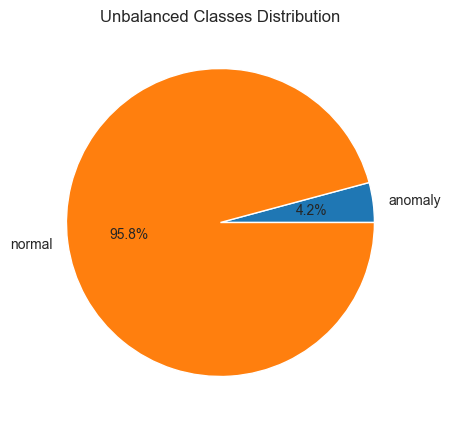

In [42]:
plt.figure(figsize=(10, 5), dpi=100)
plt.pie(x=counts["count"], labels=counts["target"], autopct="%1.1f%%")
plt.title("Unbalanced Classes Distribution")

## Feature Engineering & Selection

In [46]:
from sklearn.feature_selection import f_classif, SelectKBest

X = (polars_df.drop('target').select(cs.numeric()))  # all features except the target
y = polars_df['target']  # target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # data standardization

f_statistic, p_values = f_classif(X_scaled, y)
data = {"col_name": X.columns, "f_statistic": f_statistic, "p_values": p_values}
annova = pl.DataFrame(data)
filtered_annova = annova.filter(
    (pl.col("p_values") <= 0.05) & (pl.col("f_statistic") >= pl.mean("f_statistic") - 2200))  #Manual testing for values

most_correlated = filtered_annova['col_name'].to_list()
filtered_annova

col_name,f_statistic,p_values
str,f64,f64
"""syn_error_rate""",10571.025841,0.0
"""connection_count""",2848.992744,0.0
"""destination_server_syn_error_r…",14813.838093,0.0
"""destination_host_server_count""",1743.53087,0.0
"""destination_same_server_rate""",2092.916738,0.0
"""destination_syn_error_rate""",10941.375787,0.0
"""same_server_rate""",9530.965368,0.0
"""server_syn_error_rate""",11419.807349,0.0
"""authentication_status""",1252.844566,6.0988e-263


In [57]:
selector = SelectKBest(score_func=f_classif, k=30)  # validating the feature selection

selector.fit(X_scaled, y)

selected_indices = selector.get_support(indices=True)
print(selected_indices)
selected_features = [X.columns[i] for i in selected_indices]
print("\nSelected features: \n", selected_features)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]

Selected features: 
 ['syn_error_rate', 'connection_time', 'destination_same_source_port_rate', 'destination_different_server_rate', 'connection_count', 'destination_server_different_host_rate', 'suspicious_activity', 'server_different_host_rate', 'destination_server_syn_error_rate', 'destination_host_server_count', 'destination_same_server_rate', 'fragment_errors', 'compromised_count', 'source_bytes', 'destination_syn_error_rate', 'same_server_rate', 'reset_error_rate', 'server_request_count', 'destination_server_reset_error_rate', 'server_reset_error_rate', 'server_syn_error_rate', 'destination_bytes', 'guest_login', 'authentication_status', 'destination_host_count', 'destination_reset_error_rate', 'different_server_rate']


In [58]:
if most_correlated == selected_features:
    print(True)
else:
    most_correlated = selected_features

In [59]:
#https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f
for col in polars_df.select(pl.col(pl.Utf8)):
    if col.name == "target":
        continue

    # building contingency tables , https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.pivot.html
    contingency_df = (
        polars_df.group_by([col.name, "target"])
        .agg(pl.len().alias("count"))
        .pivot(
            values="count",
            index=col.name,
            on="target",
            aggregate_function="sum"
        )
        .fill_null(0)  # fill missing combinations with 0
    ).drop(col.name).to_numpy().astype(int)  # drop feature column and convert only counts to a numpy array
    correlation = association(contingency_df,
                              method="cramer")  # calculate Cramér's V association between the feature and target
    if correlation > 0.6:
        print(col.name, col.unique().shape[0], correlation, sep="\t")
        if col.name not in most_correlated:
            most_correlated.append(col.name)

connection_status	10	0.7204663984193229
service_type	62	0.7445614132065677


In [60]:
len(most_correlated)

29

## Data Dimensionality Reduction

### PCA

In [66]:
features = polars_df[most_correlated].to_pandas()
features = pd.get_dummies(data=features, dtype=int)
features = scaler.fit_transform(features)
PCA_features = PCA(n_components=2, random_state=0).fit_transform(features)
PCA_df = pl.DataFrame(
    {"comp1": PCA_features[:, 0], "comp2": PCA_features[:, 0], "label": polars_df["target"]})
print(PCA_features.shape)

(14036, 2)


In [67]:
PCA_df

comp1,comp2,label
f64,f64,str
-1.061557,-1.061557,"""anomaly"""
13.870142,13.870142,"""anomaly"""
13.732906,13.732906,"""anomaly"""
13.803812,13.803812,"""anomaly"""
13.651663,13.651663,"""anomaly"""
…,…,…
0.532714,0.532714,"""normal"""
-1.317995,-1.317995,"""normal"""
0.155867,0.155867,"""normal"""


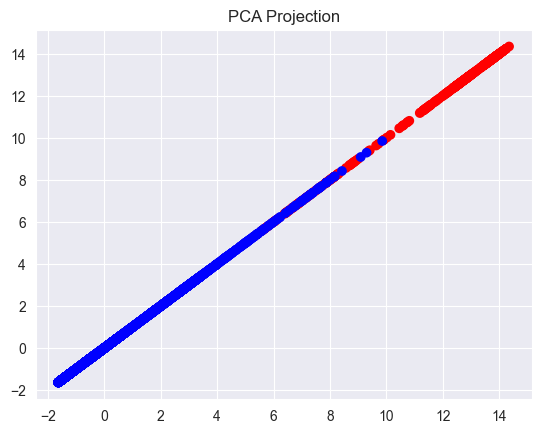

In [69]:
# https://stackoverflow.com/questions/74779644/mapping-a-python-dict-to-a-polars-series , https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/

colorsMAP = {"anomaly": "red", "normal": "blue"}
plt.scatter(PCA_df["comp1"],
            PCA_df["comp2"],
            c=polars_df["target"].replace(colorsMAP)
            )

plt.title("PCA Projection")
plt.show()

### t-SNE

In [70]:
from sklearn.manifold import TSNE

# https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d
# https://dev.to/sreeni5018/pca-vs-t-sne-unveiling-the-best-dimensionality-reduction-technique-for-your-data-ekc

tsne = TSNE(n_components=2, random_state=0)  #data - reduction
tsne_data = tsne.fit_transform(features)

In [71]:
tsne_data.shape

(14036, 2)

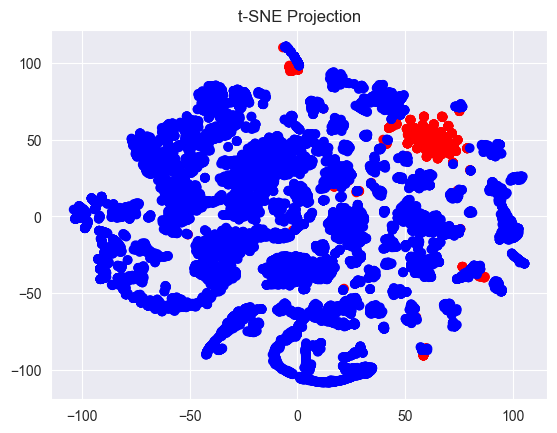

In [72]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=polars_df["target"].replace(colorsMAP))
plt.title("t-SNE Projection")
plt.show()

### UMAP

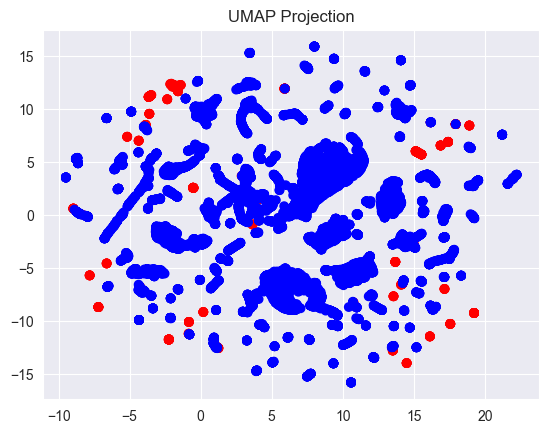

In [85]:
import umap

# https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d  , https://www.reddit.com/r/datascience/comments/wy1rmk/pca_vs_umap_vs_tsne_on_a_very_layman_level_what/
# https://medium.com/@aastha.code/dimensionality-reduction-pca-t-sne-and-umap-41d499da2df2

umap_model = umap.UMAP(n_components=2, random_state=0)
umap_data = umap_model.fit_transform(features)

plt.scatter(umap_data[:, 0], umap_data[:, 1],
            c=polars_df["target"].replace(colorsMAP)
            )
plt.title("UMAP Projection")
plt.show()

## Oversampling

In [64]:
# We use oversampling as undersampling works by removing samples of the majority class and I don't want to lose any data
# https://medium.com/@abdallahashraf90x/oversampling-for-better-machine-learning-with-imbalanced-data-68f9b5ac2696
# https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
print(
    """
    We need to know which 1 will be working good with the data and why?
    RandomOverSampler
    SMOTE
    SMOTENC prefered
    SMOTEN
    ADASYN
    BorderlineSMOTE
    KMeansSMOTE
    SVMSMOTE
    """
)


    We need to know which 1 will be working good with the data and why?
    RandomOverSampler
    SMOTE
    SMOTENC prefered
    SMOTEN
    ADASYN
    BorderlineSMOTE
    KMeansSMOTE
    SVMSMOTE
    


### SMOTE

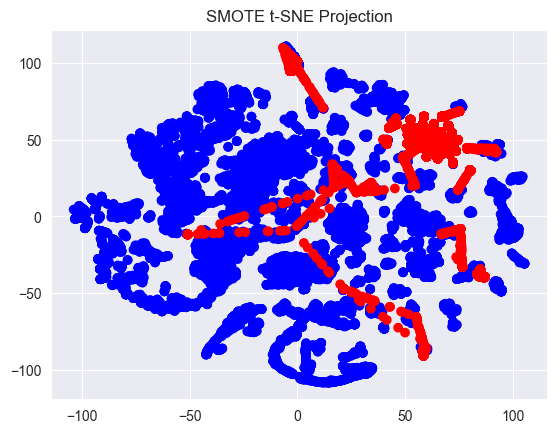

In [75]:
resampler = SMOTE(random_state=0)
X_resampled, y_resampled = resampler.fit_resample(tsne_data, polars_df["target"])

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled.replace(colorsMAP))
plt.title("SMOTE t-SNE Projection")
plt.show()

### ADASYN

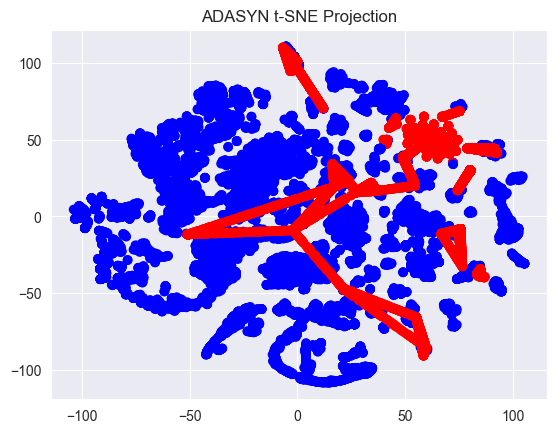

In [76]:
resampler = ADASYN(random_state=0)
X_resampled, y_resampled = resampler.fit_resample(tsne_data, polars_df["target"])

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled.replace(colorsMAP))
plt.title("ADASYN t-SNE Projection")
plt.show()

### SVMSMOTE

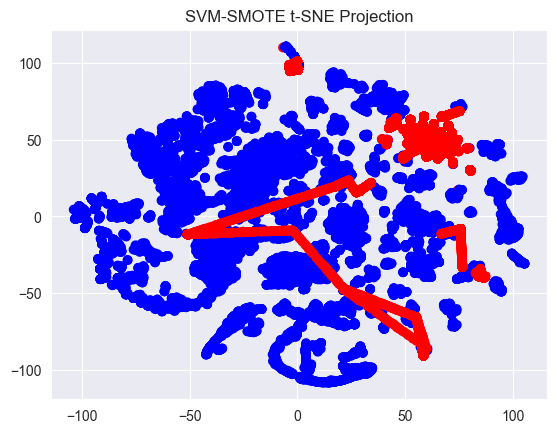

In [77]:
resampler = SVMSMOTE(random_state=0)
X_resampled, y_resampled = resampler.fit_resample(tsne_data, polars_df["target"])

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled.replace(colorsMAP))
plt.title("SVM-SMOTE t-SNE Projection")
plt.show()

### SMOTEN

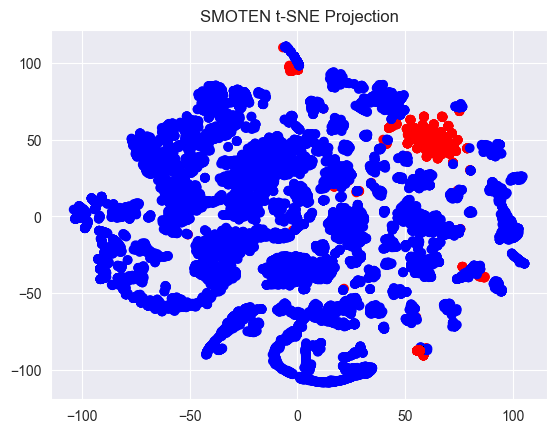

In [78]:
resampler = SMOTEN(random_state=0)
X_resampled, y_resampled = resampler.fit_resample(tsne_data, polars_df["target"])

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled.replace(colorsMAP))
plt.title("SMOTEN t-SNE Projection")
plt.show()

### Border Line SMOTE

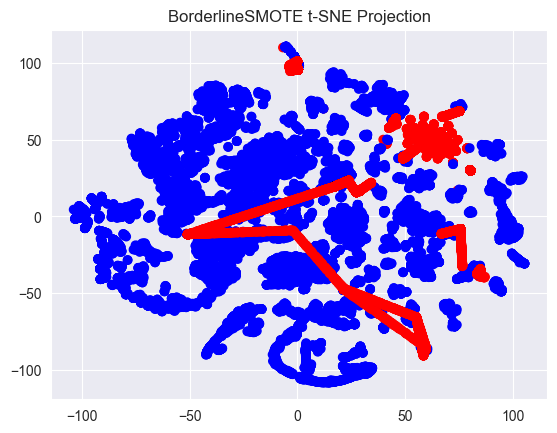

In [81]:
resampler = BorderlineSMOTE(random_state=0)
X_resampled, y_resampled = resampler.fit_resample(tsne_data, polars_df["target"])

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled.replace(colorsMAP))
plt.title("BorderlineSMOTE t-SNE Projection")
plt.show()

### K-Means SMOTE

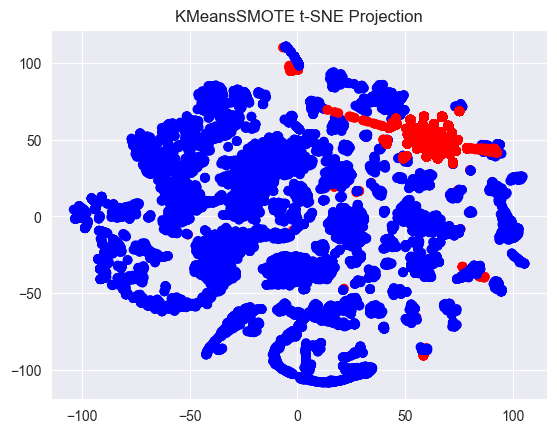

In [92]:
resampler = KMeansSMOTE(random_state=0, cluster_balance_threshold=0.2)
X_resampled, y_resampled = resampler.fit_resample(tsne_data, polars_df["target"])

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled.replace(colorsMAP))
plt.title("KMeansSMOTE t-SNE Projection")
plt.show()

# Exporting Datasets After Solving Classes Unbalance

In [93]:
# for testing
pd.concat([pd.DataFrame(X_resampled), y_resampled], axis=1, ignore_index=True).to_csv("data/original/reduced_data.csv", index=False)

In [95]:
# Chosen SMOTEN
#------------------ SMOTEN on ANOVA selected features ------------------

resampler = SMOTEN(random_state=0)
X_resampled, y_resampled = resampler.fit_resample(features, polars_df["target"])

# Combine resampled features and target 
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)

# to CSV
resampled_df.to_csv("data/ANOVA_selected_features.csv", index=False)

In [96]:
#------------------ SMOTEN on LASSO selected features ------------------

# Load dataset
LASSO_features = pd.read_csv("data/original/LASSO_selected_features.csv")

# Apply SMOTEN
X_resampled, y_resampled = SMOTEN().fit_resample(LASSO_features.drop(columns=["class"]), LASSO_features["class"])

resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)

# Save CSV 
resampled_df.to_csv("data/resampled/LASSO_selected_features.csv", index=False)

# SyntaxTesting

In [86]:
polars_df["protocol"].unique()

protocol
str
"""icmp"""
"""tcp"""
"""udp"""


In [87]:
polars_df.select(cs.string()).unique()

connection_status,protocol,service_type,target
str,str,str,str
"""S0""","""tcp""","""netbios_dgm""","""anomaly"""
"""S0""","""tcp""","""remote_job""","""anomaly"""
"""SF""","""udp""","""private""","""anomaly"""
"""S0""","""tcp""","""auth""","""anomaly"""
"""RSTO""","""tcp""","""telnet""","""normal"""
…,…,…,…
"""RSTO""","""tcp""","""IRC""","""normal"""
"""S0""","""tcp""","""http""","""anomaly"""
"""S1""","""tcp""","""private""","""normal"""


In [89]:
polars_df["connection_count"].plot.hist()

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.Chart(...)

In [90]:
polars_df["target"]

target
str
"""anomaly"""
"""anomaly"""
"""anomaly"""
"""anomaly"""
"""anomaly"""
…
"""normal"""
"""normal"""
"""normal"""
